<a href="https://colab.research.google.com/github/MemoryMaker1412/Dog_Breed_Prediction/blob/main/Dog_Breed_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!mkdir dog_dataset
%cd dog_dataset

mkdir: cannot create directory ‘dog_dataset’: File exists
/content/dog_dataset


In [13]:
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           7475         10  0.1764706        


In [14]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..

Dataset URL: https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp
License(s): unknown
100% 691M/691M [00:35<00:00, 22.5MB/s]
100% 691M/691M [00:35<00:00, 20.4MB/s]
/content


In [15]:
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset/train/840db91b

In [16]:
#Adding Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

In [17]:
#Checking labels
labels = pd.read_csv('dog_dataset/labels.csv')
print(labels.shape)
labels.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [18]:
#Check count of each breed
breed_count = labels.groupby('breed').count()
breed_count.sort_values(by='id', ascending=False, inplace=True)
breed_count.head(10)

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


In [36]:
#Selecting breeds
Class_Names = ['scottish_deerhound','maltese_dog','pomeranian']
labels = labels[labels['breed'].isin(Class_Names)]
labels = labels.reset_index()
labels.head()

,level_0,index,id,breed
0,0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,5,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,9,161,03dc61595ad9dbf49e3998cf586ca8cb,scottish_deerhound


In [52]:
#Normalize the data
X_Data = np.zeros(shape=(len(labels), 224, 224, 3), dtype = 'float32')
y_Data = label_binarize(labels['breed'], classes=Class_Names)

In [53]:
#converting images to numpy array
for i in tqdm(range(len(labels))):
  img = image.load_img('dog_dataset/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
  img = image.img_to_array(img)
  x = np.expand_dims(img.copy(),axis=0)
  X_Data[i] = x/255
print('Training Image Shape',X_Data.shape)
print('Training Image Size',X_Data.size)
print('Output Image Shape',y_Data.shape)
print('Output Image Size',y_Data.size)

100%|██████████| 354/354 [00:00<00:00, 517.09it/s]

Training Image Shape (354, 224, 224, 3)
Training Image Size 53286912
Output Image Shape (354, 3)
Output Image Size 1062


In [55]:
#Building the Model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(7,7), activation='relu', kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8, kernel_size=(5,5), activation='relu', kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=4, kernel_size=(3,3), activation='relu', kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=2, kernel_size=(3,3), activation='relu', kernel_regularizer='l2'))
# model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dense(len(Class_Names), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 220, 220, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 108, 108, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 48, 48, 16)          │          25,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 20, 20, 8)           │           3,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 10, 10, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 8, 8, 4)             │             292 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,703 (268.37 KB)

 Trainable params: 68,703 (268.37 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
from re import X
#Splitting the data
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X_Data, y_Data, test_size=0.1)
#Split Training data to get validation set
X_train,X_val,Y_train,Y_val = train_test_split(X_train_and_val, y_train_and_val, test_size=0.1)

In [61]:
#Training the model
epoch = 100
batch_size = 128
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch, validation_data=(X_val, Y_val))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.7287 - loss: 2.2938 - val_accuracy: 0.7188 - val_loss: 2.2257
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.7382 - loss: 2.2662 - val_accuracy: 0.7188 - val_loss: 2.2161
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.7669 - loss: 2.2711 - val_accuracy: 0.7188 - val_loss: 2.2140
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.7329 - loss: 2.2643 - val_accuracy: 0.7188 - val_loss: 2.2218
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.7673 - loss: 2.2271 - val_accuracy: 0.7188 - val_loss: 2.2191
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.7407 - loss: 2.2543 - val_accuracy: 0.7188 - val_loss: 2.2165
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.7610 - loss: 2.2348 - val_accuracy: 0.7188 - val_loss: 2.2621
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.7049 - loss: 2.2818 - val_accuracy: 0.7188 - v

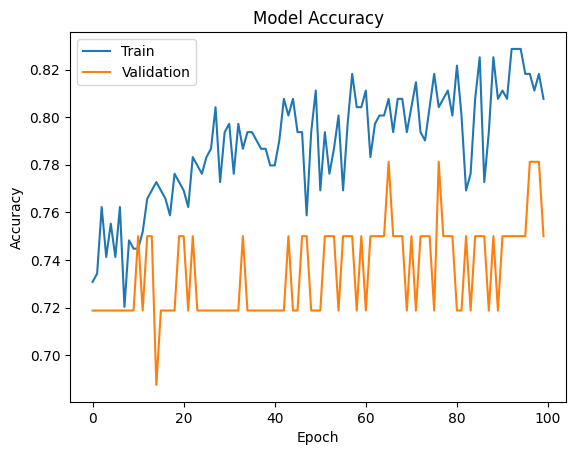

In [62]:
#plotting the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [63]:
#Evalulate the model
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8368 - loss: 1.7917
Test loss: 1.7932639122009277
Test accuracy: 0.8333333134651184


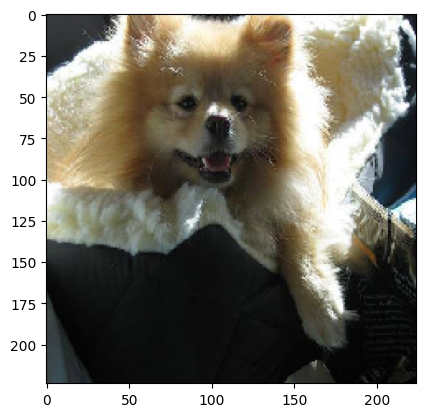

Predicted Dog Breed:  pomeranian
Original Dog Breed:  pomeranian


In [65]:
#Plotting Image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

#Finding max value from prediction list and comparing original value
print("Predicted Dog Breed: ",Class_Names[np.argmax(Y_pred[1])])
print("Original Dog Breed: ",Class_Names[np.argmax(y_test[1])])

In [66]:
model.save('dog_breed_model.h5')